In [12]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from feadme.parser import Template, Disk, Parameter
from feadme.compose import evaluate_disk_model
import astropy.units as u
import astropy.constants as const
from feadme.models.hung_model import e_model

In [13]:
c_cgs = const.c.cgs.value

redshift = 0.01
wave = np.linspace(6300, 6800, 100)
center = 6562.819

velocity = (wave - center) / center * c_cgs

nu = c_cgs / (wave * 1e-8)
nu0 = c_cgs / (center * 1e-8)
X = nu / nu0 - 1

In [14]:
disk_profile = Disk(
    name="halpha_disk",
    center=Parameter(name="center", distribution="normal", low=6562.819 - 5, high=6562.819 + 5, loc=6562.819, scale=1),
    inner_radius=Parameter(name="inner_radius", distribution="log_uniform", low=1e2, high=5e3),
    delta_radius=Parameter(name="delta_radius", distribution="log_uniform", low=5e2, high=1e5),
    inclination=Parameter(name="inclination", distribution="normal", low=0, high=np.pi / 2, loc=np.pi / 4, scale=np.pi / 8),
    sigma=Parameter(name="sigma", distribution="log_uniform", low=1e2, high=1e4),
    q=Parameter(name="q", distribution="uniform", low=0.5, high=4),
    eccentricity=Parameter(name="eccentricity", distribution="uniform", low=0, high=1),
    apocenter=Parameter(name="apocenter", distribution="uniform", low=0, high=2 * np.pi, loc=np.pi, scale=np.pi / 4),
    scale=Parameter(name="scale", distribution="uniform", low=0, high=1),
    offset=Parameter(name="offset", distribution="uniform", low=0, high=0.05, fixed=True, value=0)
)

template = Template(
    name="test",
    redshift=0.0,
    mjd=0,
    data_path="",
    disk_profiles=[
        disk_profile,
    ],
    line_profiles=[],
)

param_mods = {
    "halpha_disk_center": 6562.819,
    "halpha_disk_inner_radius": 500,
    "halpha_disk_outer_radius": 2500,
    "halpha_disk_inclination": np.pi / 6,
    "halpha_disk_sigma": 800,
    "halpha_disk_q": 3,
    "halpha_disk_eccentricity": 0.3,
    "halpha_disk_apocenter": np.pi / 2,
    "halpha_disk_scale": 1,
    "halpha_disk_offset": 0,
}

In [15]:
def test_inner_radius():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, inrad in enumerate([2e2, 4e2, 6e2, 8e2, 1e3]):
        pmod = param_mods.copy()
        pmod["halpha_disk_inner_radius"] = inrad
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)

        ax.plot(wave, flux + i * 0.5, label=f"Inner Radius: {inrad:.0f}", color=plt.cm.viridis(inrad / 1e3))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(inrad / 1e3), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            pmod['halpha_disk_sigma'],
            pmod['halpha_disk_inclination'],
            pmod['halpha_disk_eccentricity'],
            pmod['halpha_disk_apocenter'],
            # pmod['halpha_disk_inner_radius'],
            inrad,
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(inrad / 1e3))

    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Inner Radius Test")
    ax.legend()

In [16]:
def test_outer_radius():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, outrad in enumerate([1e3, 4e3, 6e3, 8e3, 1e4, 1e5]):
        pmod = param_mods.copy()
        pmod["halpha_disk_outer_radius"] = outrad
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod)
        
        ax.plot(wave, flux + i * 0.5, label=f"Outer Radius: {outrad:.0f}", color=plt.cm.viridis(outrad / 1e5))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(outrad / 1e5), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            pmod['halpha_disk_sigma'],
            pmod['halpha_disk_inclination'],
            pmod['halpha_disk_eccentricity'],
            pmod['halpha_disk_apocenter'],
            pmod['halpha_disk_inner_radius'],
            # pmod['halpha_disk_outer_radius'],
            outrad
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(outrad / 1e5))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Outer Radius Test")
    ax.legend()

In [17]:
def test_inclination():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, inc in enumerate(np.linspace(np.pi / 2 / 4 * 3, np.pi / 2, 5)):
        pmod = param_mods.copy()
        pmod["halpha_disk_inclination"] = inc
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)
        ax.plot(wave, flux + i * 0.5, label=f"Inclination: {inc:.2f}", color=plt.cm.viridis(inc / np.pi / 2))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(inc / np.pi / 2), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            pmod['halpha_disk_sigma'],
            # pmod['halpha_disk_inclination'],
            inc,
            pmod['halpha_disk_eccentricity'],
            pmod['halpha_disk_apocenter'],
            pmod['halpha_disk_inner_radius'],
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(inc / np.pi / 2))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Inclination Test")
    ax.legend()

In [18]:
def test_sigma():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, sig in enumerate([2e2, 5e2, 1e3, 2e3, 3e3]):
        pmod = param_mods.copy()
        pmod["halpha_disk_sigma"] = sig
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)
        
        ax.plot(wave, flux + i * 0.5, label=f"Sigma: {sig:.0f}", color=plt.cm.viridis(sig / 3e3))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(sig / 3e3), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            # pmod['halpha_disk_sigma'],
            sig,
            pmod['halpha_disk_inclination'],
            pmod['halpha_disk_eccentricity'],
            pmod['halpha_disk_apocenter'],
            pmod['halpha_disk_inner_radius'],
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(sig / 3e3))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Sigma Test")
    ax.legend()

In [19]:
def test_q():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, q in enumerate([0.5, 1, 2, 3, 4]):
        pmod = param_mods.copy()
        pmod["halpha_disk_q"] = q
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)

        ax.plot(wave, flux + i * 0.5, label=f"q: {q:.1f}", color=plt.cm.viridis(q / 4))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(q / 4), linestyle=":")

        flux_hung = e_model([
            # pmod['halpha_disk_q'],
            q,
            pmod['halpha_disk_sigma'],
            pmod['halpha_disk_inclination'],
            pmod['halpha_disk_eccentricity'],
            pmod['halpha_disk_apocenter'],
            pmod['halpha_disk_inner_radius'],
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(q / 4))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("q Test")
    ax.legend()

In [20]:
def test_eccentricity():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, ecc in enumerate([0, 0.2, 0.4, 0.6, 0.8, 0.99, 1]):
    # for ecc in [0, 0.1, 0.3, 0.5]:
    # for i, ecc in enumerate(np.linspace(0.1, 0.55, 5)):
        pmod = param_mods.copy()
        pmod["halpha_disk_eccentricity"] = ecc
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)

        ax.plot(wave, flux + i * 0.5, label=f"Eccentricity: {ecc:.2f}",  color=plt.cm.viridis(ecc))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(ecc), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            pmod['halpha_disk_sigma'],
            pmod['halpha_disk_inclination'],
            # pmod['halpha_disk_eccentricity'],
            ecc,
            pmod['halpha_disk_apocenter'],
            pmod['halpha_disk_inner_radius'],
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(ecc))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.axvline(6600, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Eccentricity Test")
    ax.legend()

In [21]:
def test_apocenter():
    fig, ax = plt.subplots(figsize=(6, 8))

    for i, apo in enumerate(np.linspace(0, 2 * np.pi, 10)):
        pmod = param_mods.copy()
        pmod["halpha_disk_apocenter"] = apo
        flux, _, _ = evaluate_disk_model(template, wave, pmod)
        qflux, _, _ = evaluate_disk_model(template, wave, pmod, use_quad=True)

        ax.plot(wave, flux + i * 0.5, label=f"Apocenter: {np.rad2deg(apo):.2f}",  color=plt.cm.viridis(apo / (2 * np.pi)))
        ax.plot(wave, qflux + i * 0.5, color=plt.cm.viridis(apo / (2 * np.pi)), linestyle=":")

        flux_hung = e_model([
            pmod['halpha_disk_q'],
            pmod['halpha_disk_sigma'],
            pmod['halpha_disk_inclination'],
            pmod['halpha_disk_eccentricity'],
            # pmod['halpha_disk_apocenter'],
            apo,
            pmod['halpha_disk_inner_radius'],
            pmod['halpha_disk_outer_radius'],
            ], -X)
        
        ax.plot(wave, flux_hung + i * 0.5, linestyle="--",  color=plt.cm.viridis(apo / (2 * np.pi)))

    ax.axvline(6563, linestyle="dashed", color="grey")
    ax.set_xlabel("Wavelength (AA)")
    ax.set_ylabel("Normalized Flux")
    ax.set_title("Apocenter Test")
    ax.legend()

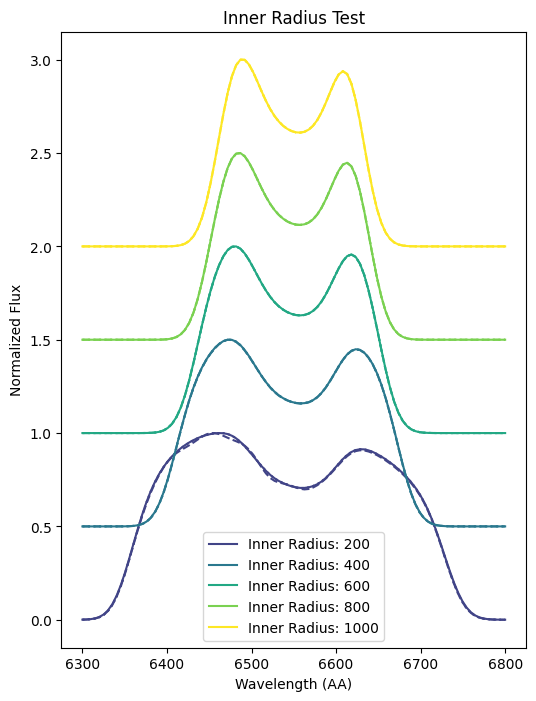

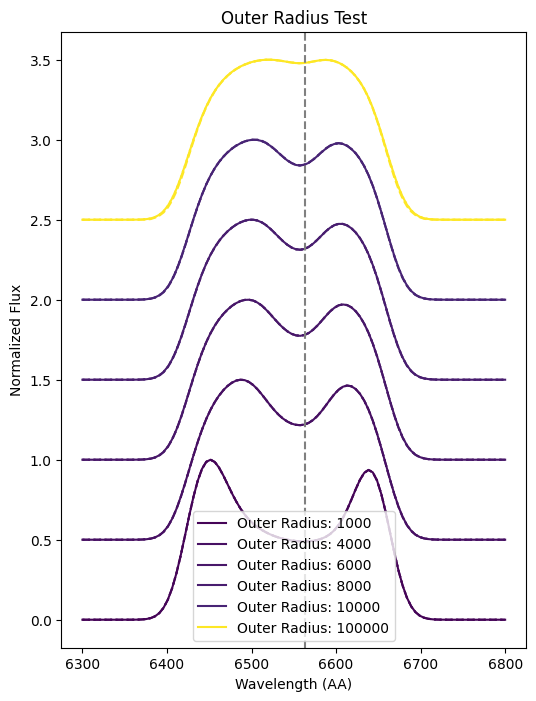

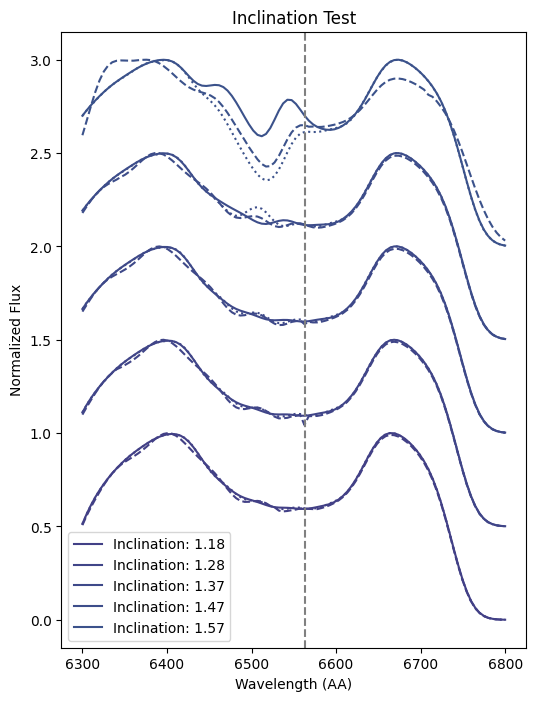

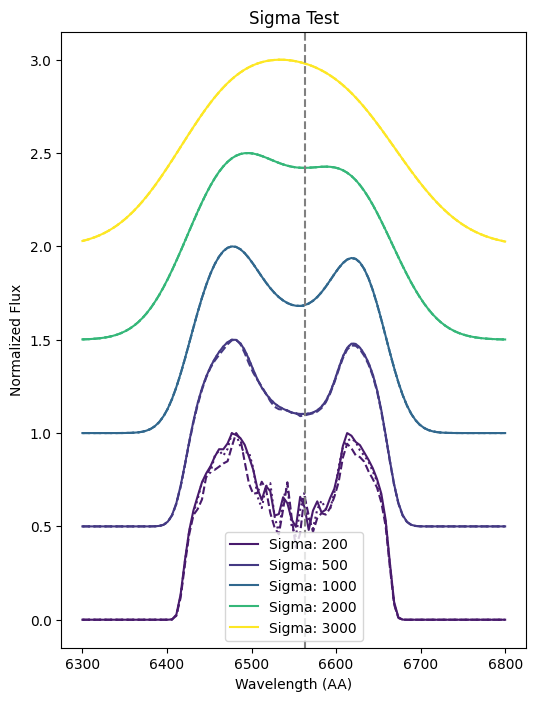

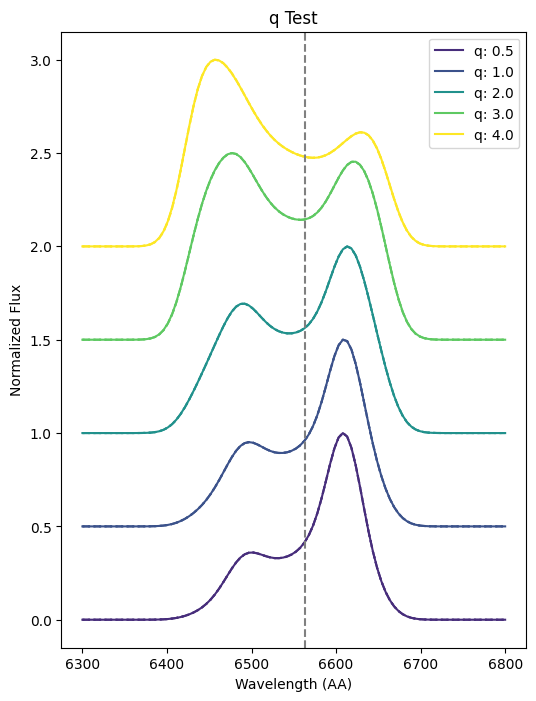

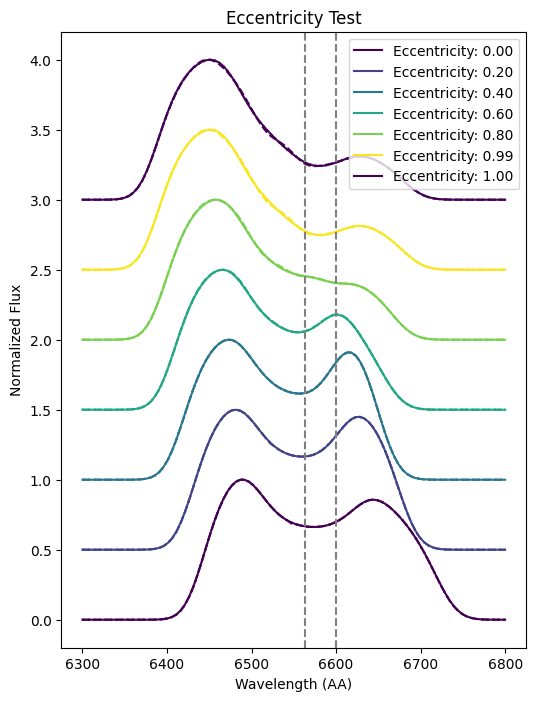

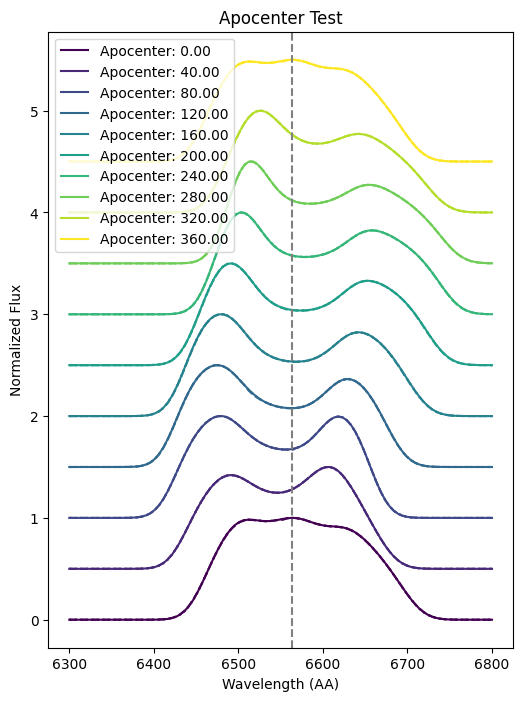

In [22]:
test_inner_radius()
test_outer_radius()
test_inclination()
test_sigma()
test_q()
test_eccentricity()
test_apocenter()